In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mysql.connector
import os

# Setup
os.makedirs("static/graphs", exist_ok=True)

# Connect to MySQL
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='00000',
    database='hospital'
)

# Load data
df = pd.read_sql("SELECT * FROM merged_patient_data", conn)

C:\Users\kings\AppData\Local\Temp\ipykernel_17452\931637892.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM merged_patient_data", conn)


In [10]:
print(df.describe())
print(df.info())

           height  initial_weight   education        income  age_at_menarche  \
count  384.000000      384.000000  384.000000    384.000000       384.000000   
mean   151.729167       53.564583   10.708333  13906.250000        13.375000   
std      6.426900       12.201633    2.460833   6187.797518         1.236942   
min    135.000000       28.700000    4.000000   1000.000000        10.000000   
25%    148.000000       43.400000    9.750000  10000.000000        13.000000   
50%    152.000000       53.800000   12.000000  11000.000000        13.000000   
75%    156.000000       60.800000   12.000000  18000.000000        14.000000   
max    175.000000       90.000000   15.000000  30000.000000        19.000000   

       age_at_marriage  age_at_first_pregnancy  age_at_delivery  \
count       384.000000              384.000000       384.000000   
mean         22.729167               24.479167        26.489583   
std           2.859565                3.380111         4.123409   
min        

In [12]:
# 1. Correlation Heatmap
plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.savefig("static/graphs/correlation.png")
plt.close()

In [13]:
df['visit_date'] = pd.to_datetime(df['visit_date'])
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='visit_date', y='bp_sys', hue='patient_id', marker="o")
plt.title("Systolic BP Over Time by Patient")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("static/graphs/bp_over_time.png")
plt.close()

C:\Users\kings\AppData\Local\Temp\ipykernel_17452\948105217.py:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


C:\Users\kings\AppData\Local\Temp\ipykernel_17452\817635001.py:4: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


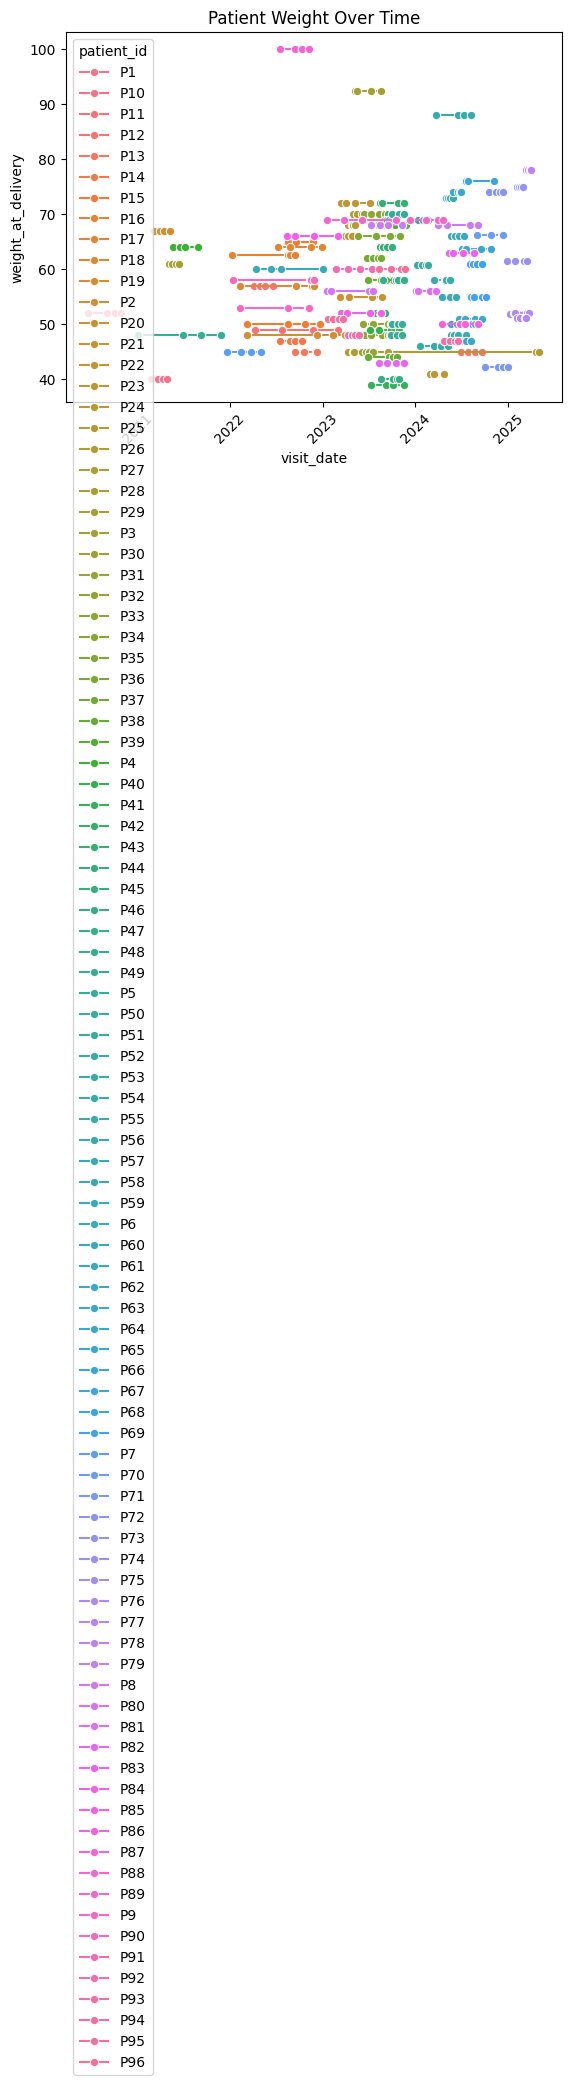

In [7]:
sns.lineplot(data=df, x='visit_date', y='weight_at_delivery', hue='patient_id', marker="o")
plt.title("Patient Weight Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='visit_date', y='initial_weight', hue='patient_id', marker="o")
plt.title("Patient Weight Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("static/graphs/weight_over_time.png")
plt.close()

C:\Users\kings\AppData\Local\Temp\ipykernel_17452\1454663446.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
